### Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Multi-class Classification

#### Importing Required Libraries:

In [5]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#os.environ['OMP_NUM_THREADS'] = '1'
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.8.2'

#### Load Image Data:

In [6]:
DATA_LIST = os.listdir('drive/MyDrive/Covid_Data_GradientCrescent/all/train')
DATASET_PATH  = 'drive/MyDrive/Covid_Data_GradientCrescent/all/train'
TEST_DIR =  'drive/MyDrive/Covid_Data_GradientCrescent/all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches:

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


# **Architecture 2: InceptionV3**

#### Build Model

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Model, Sequential

inception_model = InceptionV3(weights='imagenet', include_top=False)


x = inception_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(4, activation='softmax')(x)

model_2 = Model(inputs=inception_model.input, outputs=predictions)

for layer in inception_model.layers:
    layer.trainable = False

model_2.summary()

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

87924736/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                  

#### Train Model

In [9]:
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

#raise NotImplementedError("Use the model.fit function to train your network")
history = model_2.fit(x=train_batches, epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, 
           validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
21/21 [==============================] - 212s 9s/step - loss: 1.7230 - accuracy: 0.4417 - val_loss: 1.0978 - val_accuracy: 0.6000
Epoch 2/100
21/21 [==============================] - 7s 350ms/step - loss: 0.9400 - accuracy: 0.5874 - val_loss: 0.9057 - val_accuracy: 0.5800
Epoch 3/100
21/21 [==============================] - 7s 351ms/step - loss: 0.7742 - accuracy: 0.6359 - val_loss: 0.9933 - val_accuracy: 0.6000
Epoch 4/100
21/21 [==============================] - 7s 357ms/step - loss: 0.7614 - accuracy: 0.6893 - val_loss: 0.8429 - val_accuracy: 0.6000
Epoch 5/100
21/21 [==============================] - 8s 361ms/step - loss: 0.8688 - accuracy: 0.6117 - val_loss: 0.9850 - val_accuracy: 0.6400
Epoch 6/100
21/21 [==============================] - 7s 357ms/step - loss: 0.6275 - accuracy: 0.7379 - val_loss: 0.8122 - val_accuracy: 0.6600
Epoch 7/100
21/21 [==============================] - 7s 357ms/step - loss: 0.6378 - accuracy: 0.7427 - val_loss: 0.8147 - val_accuracy: 0.5800


#### Plot Accuracy and Loss During Training

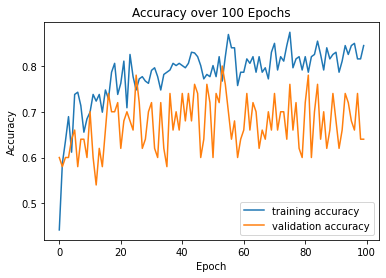

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over 100 Epochs")
plt.legend(loc='lower right')

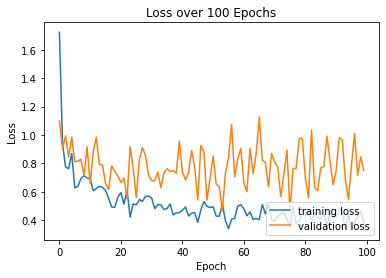

In [11]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over 100 Epochs")
plt.legend(loc='lower right')

In [12]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model_2.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


36/36 [==============================] - 29s 809ms/step - loss: 0.6960 - accuracy: 0.6389
Test loss: 0.6959892511367798
Test accuracy: 0.6388888955116272


## TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

In [16]:
from sklearn.manifold import TSNE


intermediate_layer_model = model_2.Model(inputs=model_2.input,
                                        outputs=model_2.get_layer('dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")

outputs = []
labels = []
for i in range(len(tsne_eval_generator)):
  img, label = tsne_eval_generator[i]
  labels.append(label)
  cur = intermediate_layer_model(img)
  outputs.append(np.squeeze(cur))

features = np.array(outputs)
labels = np.array(labels).astype('int32')

# new_labels = []
# for i in range(len(labels)):
#   if labels[i][0][0] == 1:
#     new_labels.append(0)
#   if labels[i][0][1] == 1:
#     new_labels.append(1)
#   if labels[i][0][2] == 1:
#     new_labels.append(2)
#   if labels[i][0][2] == 1:
#     new_labels.append(3)

# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(features)

# LABEL_COLOR_MAP = {0: 'r', 1: 'b', 2: 'g', 3: 'p'}
# label_color = [LABEL_COLOR_MAP[l] for l in new_labels]

# X = X_tsne[:,0]
# Y = X_tsne[:,1]

# # plt.scatter(X, Y, label=label_color)
# # plt.title('T-SNE Scatter Plot')
# # plt.legend(loc="upper left")
# # plt.show()

# plt.scatter(X_tsne[:,1], X_tsne[:,0], c=label_color)
# plt.title('T-SNE Scatter Plot')
# plt.legend(loc="upper left")
# plt.show()

# raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                           "and plot the resulting 2D features of the four classes.")

AttributeError: ignored

In [15]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(features)

X = X_tsne[:,0]
Y = X_tsne[:,1]

plt.scatter(X, Y)
plt.show()

NameError: ignored